First, we create a dataset of the 

In [1]:
from numeric_image_synthetic_data import generate_dataset
from evaluate import cross_validate_linear_subspace

In [2]:
s = 20  # Size of vocabulary
num_classes = 4  # Number of classes (K)
t = 10  # Size of class vocabulary
q1 = 12  # Features to pick from T1_y
q2 = 12  # Features to pick from T2_y
num_samples = 1000  # Number of data points to generate
r = 0 # Probability of introducing dependency between the two views
dataset_F1, dataset_F2, labels = generate_dataset(s, num_classes, t, q1, q2, num_samples, r)

In [ ]:
results = cross_validate_linear_subspace(dataset_F1=dataset_F1, dataset_F2=dataset_F2, labels=labels, unlabeled_proportion=.95, t_func = "")


--- Fold 1 ---
X1_train_unlabeled (759, 12)
X2_train_unlabeled (759, 12)
Transformed Model - Fold 1: Accuracy=0.6450, Precision=0.6952, Recall=0.6450, F1=0.6507
[[23  0  9 19]
 [ 0 42  0  9]
 [ 1  0 29 22]
 [ 9  0  0 37]]
Baseline Model - Fold 1: Accuracy=0.6550, Precision=0.7290, Recall=0.6550, F1=0.6655

--- Fold 2 ---
X1_train_unlabeled (759, 12)
X2_train_unlabeled (759, 12)
Transformed Model - Fold 2: Accuracy=0.6700, Precision=0.7650, Recall=0.6700, F1=0.6655
[[31  0 15  3]
 [ 0 41 11  0]
 [ 0  0 57  0]
 [27  0 12  3]]
Baseline Model - Fold 2: Accuracy=0.6600, Precision=0.6669, Recall=0.6600, F1=0.6112

--- Fold 3 ---
X1_train_unlabeled (759, 12)
X2_train_unlabeled (759, 12)
Transformed Model - Fold 3: Accuracy=0.5300, Precision=0.6179, Recall=0.5300, F1=0.5250
[[18  0  0 31]
 [ 6 35  7  0]
 [ 0  0 40 17]
 [12  0  4 30]]
Baseline Model - Fold 3: Accuracy=0.6150, Precision=0.6745, Recall=0.6150, F1=0.6286

--- Fold 4 ---
X1_train_unlabeled (759, 12)
X2_train_unlabeled (759, 12)
Tr

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters to vary
r_values = np.linspace(0, 1, 11)  # Vary r from 0 to 1 (11 values)
k_values = range(2, 11)  # Number of classes (K) from 2 to 10

# Storage for results
results_dict = {'r': [], 'k': [], 'accuracy_transformed': [], 'accuracy_baseline': []}

for r in r_values:
    for k in k_values:
        # Generate the dataset
        dataset_F1, dataset_F2, labels = generate_dataset(
            s=20, 
            num_classes=k, 
            t=10, 
            q1=12, 
            q2=12, 
            num_samples=1000, 
            r=r
        )
        
        # Cross-validate and get results
        results = cross_validate_linear_subspace(
            dataset_F1=dataset_F1, 
            dataset_F2=dataset_F2, 
            labels=labels, 
            unlabeled_proportion=0.95
        )
        
        # Get mean accuracy for transformed and baseline
        accuracy_transformed = np.mean(results['transformed']['accuracy'])
        accuracy_baseline = np.mean(results['baseline']['accuracy'])
        
        # Store results
        results_dict['r'].append(r)
        results_dict['k'].append(k)
        results_dict['accuracy_transformed'].append(accuracy_transformed)
        results_dict['accuracy_baseline'].append(accuracy_baseline)



--- Fold 1 ---
X1_train_unlabeled (759, 12)
X2_train_unlabeled (759, 12)
Transformed Model - Fold 1: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000
[[102   0]
 [  0  98]]
Baseline Model - Fold 1: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000

--- Fold 2 ---
X1_train_unlabeled (759, 12)
X2_train_unlabeled (759, 12)
Transformed Model - Fold 2: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000
[[ 99   0]
 [  0 101]]
Baseline Model - Fold 2: Accuracy=1.0000, Precision=1.0000, Recall=1.0000, F1=1.0000

--- Fold 3 ---
X1_train_unlabeled (759, 12)
X2_train_unlabeled (759, 12)
Transformed Model - Fold 3: Accuracy=0.9700, Precision=0.9718, Recall=0.9700, F1=0.9700
[[99  6]
 [ 0 95]]
Baseline Model - Fold 3: Accuracy=0.9700, Precision=0.9718, Recall=0.9700, F1=0.9700

--- Fold 4 ---
X1_train_unlabeled (759, 12)
X2_train_unlabeled (759, 12)
Transformed Model - Fold 4: Accuracy=0.9550, Precision=0.9586, Recall=0.9550, F1=0.9548
[[105   0]
 [  2  93]]
Baseline 

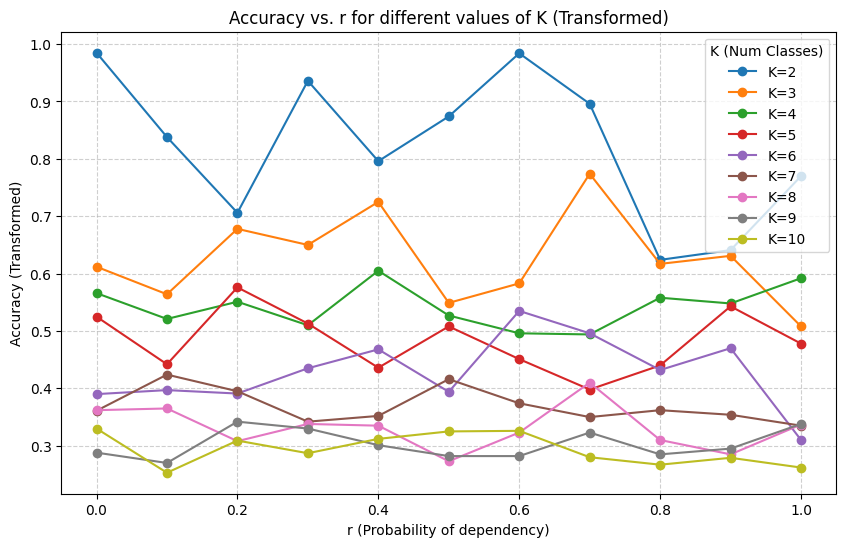

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert results to a DataFrame for easy plotting
df = pd.DataFrame(results_dict)

# Plot accuracy vs. r for each k
plt.figure(figsize=(10, 6))
for k in k_values:
    df_k = df[df['k'] == k]
    plt.plot(df_k['r'], df_k['accuracy_transformed'], label=f'K={k}', marker='o')

plt.xlabel('r (Probability of dependency)')
plt.ylabel('Accuracy (Transformed)')
plt.title('Accuracy vs. r for different values of K (Transformed)')
plt.legend(title="K (Num Classes)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


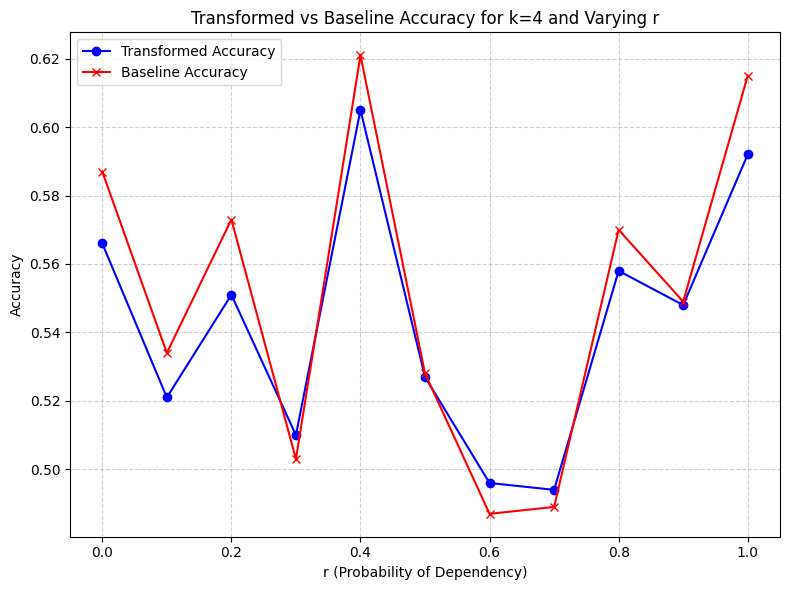

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the experiment has been run and results_dict is populated
df = pd.DataFrame(results_dict)

# Filter the data for k = 4
df_k4 = df[df['k'] == 4]

# Plot both transformed and baseline accuracy for varying r
plt.figure(figsize=(8, 6))
plt.plot(df_k4['r'], df_k4['accuracy_transformed'], label='Transformed Accuracy', marker='o', color='blue')
plt.plot(df_k4['r'], df_k4['accuracy_baseline'], label='Baseline Accuracy', marker='x', color='red')

# Add labels and title
plt.xlabel('r (Probability of Dependency)')
plt.ylabel('Accuracy')
plt.title('Transformed vs Baseline Accuracy for k=4 and Varying r')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import pandas as pd

# List to store results
results_list = []

# Range of unlabeled proportions from 0.5 to 1 with a step size of 0.05
unlabeled_proportions = [.5, .55, .6, .65, .7, .75, .8, .85, .9, .95, .99]

# Loop through each unlabeled_proportion
for unlabeled_proportion in unlabeled_proportions:
    # Run the experiment
    results = cross_validate_linear_subspace(
        dataset_F1=dataset_F1,
        dataset_F2=dataset_F2,
        labels=labels,
        unlabeled_proportion=unlabeled_proportion
    )
    
    # Store the results
    results_list.append({
        'unlabeled_proportion': unlabeled_proportion,
        'accuracy_transformed': np.mean(results['transformed']['accuracy']),
        'accuracy_baseline': np.mean(results['baseline']['accuracy']),
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results_list)

# Display the results
print(results_df)



--- Fold 1 ---
X1_train_unlabeled (400, 12)
X2_train_unlabeled (400, 12)
Transformed Model - Fold 1: Accuracy=0.5650, Precision=0.5519, Recall=0.5650, F1=0.5346
[[ 3  9  4  0  5  0  0  0  0  0]
 [ 0 18  0  0  0  0  2  0  0  0]
 [ 0  0  5  0  4  5  6  0  0  0]
 [ 0  0  2 24  0  0  0  0  0  0]
 [ 2  1  3  0  4  3  3  0  0  1]
 [ 0  0  0  0  2 13  0  1  4  0]
 [ 0  1  0  0  6  1  7  2  0  0]
 [ 0  0  0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  2  0  0 20  0]
 [ 0  0  3 13  0  0  0  0  1  4]]
Baseline Model - Fold 1: Accuracy=0.5700, Precision=0.5816, Recall=0.5700, F1=0.5338

--- Fold 2 ---
X1_train_unlabeled (400, 12)
X2_train_unlabeled (400, 12)
Transformed Model - Fold 2: Accuracy=0.5550, Precision=0.5494, Recall=0.5550, F1=0.5432
[[ 4 15  1  0  0  0  3  0  0  0]
 [ 3 21  0  0  0  0  2  0  0  0]
 [ 1  3  7  0  0  5  0  0  0  5]
 [ 0  0  0 11  0  0  0  0  0  4]
 [ 2  2  1  0  4  0  6  0  0  0]
 [ 0  0  0  0  2  7  7  1  2  0]
 [ 3  0  5  0  7  0  5  2  0  0]
 [ 0  0  0  0  0  3  1 18  0 

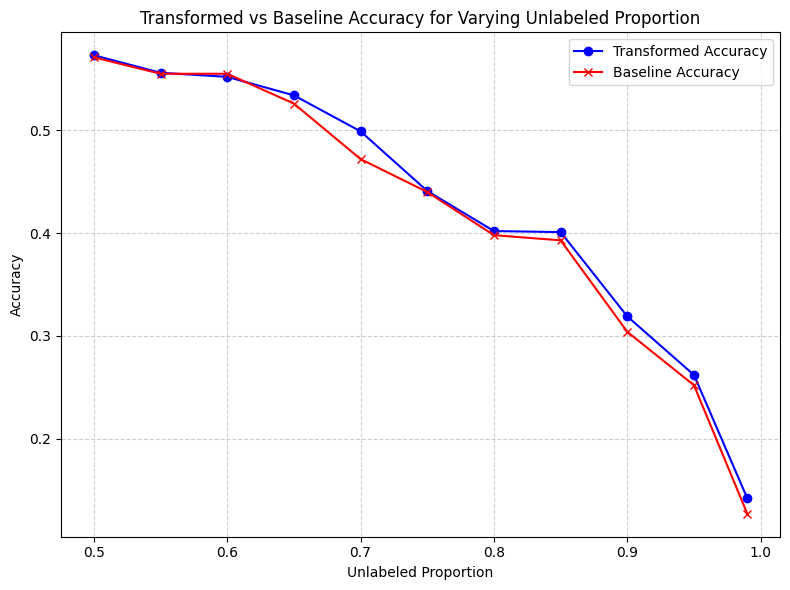

In [13]:
import matplotlib.pyplot as plt

# Plotting the transformed vs baseline accuracy
plt.figure(figsize=(8, 6))
plt.plot(results_df['unlabeled_proportion'], results_df['accuracy_transformed'], label='Transformed Accuracy', marker='o', color='blue')
plt.plot(results_df['unlabeled_proportion'], results_df['accuracy_baseline'], label='Baseline Accuracy', marker='x', color='red')

# Add labels and title
plt.xlabel('Unlabeled Proportion')
plt.ylabel('Accuracy')
plt.title('Transformed vs Baseline Accuracy for Varying Unlabeled Proportion')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


In [5]:
from t_functions import (t_func_original, t_func_softmax, t_func_threshold, 
                         t_func_l2_normalized, t_func_rank, t_func_top_k, 
                         t_func_binning, t_func_zscore)
# List of transformation functions to evaluate

transformation_names = ["t_func_original", "t_func_softmax", "t_func_threshold",
                            "t_func_l2_normalized", "t_func_rank", "t_func_top_k",
                            "t_func_binning", "t_func_zscore"]



--- Fold 1 ---
X1_train_unlabeled (40, 12)
X2_train_unlabeled (40, 12)
Transformed Model - Fold 1: Accuracy=0.8100, Precision=0.8100, Recall=0.8100, F1=0.8100
[[24  0  0 18]
 [ 0 52  0  0]
 [ 0  0 49  0]
 [19  0  0 38]]
Baseline Model - Fold 1: Accuracy=0.8150, Precision=0.8156, Recall=0.8150, F1=0.8153

--- Fold 2 ---
X1_train_unlabeled (40, 12)
X2_train_unlabeled (40, 12)
Transformed Model - Fold 2: Accuracy=0.8200, Precision=0.8200, Recall=0.8200, F1=0.8200
[[30  0  0 18]
 [ 0 54  0  0]
 [ 0  0 49  0]
 [18  0  0 31]]
Baseline Model - Fold 2: Accuracy=0.8200, Precision=0.8200, Recall=0.8200, F1=0.8200

--- Fold 3 ---
X1_train_unlabeled (40, 12)
X2_train_unlabeled (40, 12)
Transformed Model - Fold 3: Accuracy=0.8500, Precision=0.8623, Recall=0.8500, F1=0.8488
[[29  0  0 23]
 [ 0 56  0  0]
 [ 0  0 49  0]
 [ 8  0  0 35]]
Baseline Model - Fold 3: Accuracy=0.8450, Precision=0.8585, Recall=0.8450, F1=0.8434

--- Fold 4 ---
X1_train_unlabeled (40, 12)
X2_train_unlabeled (40, 12)
Transforme

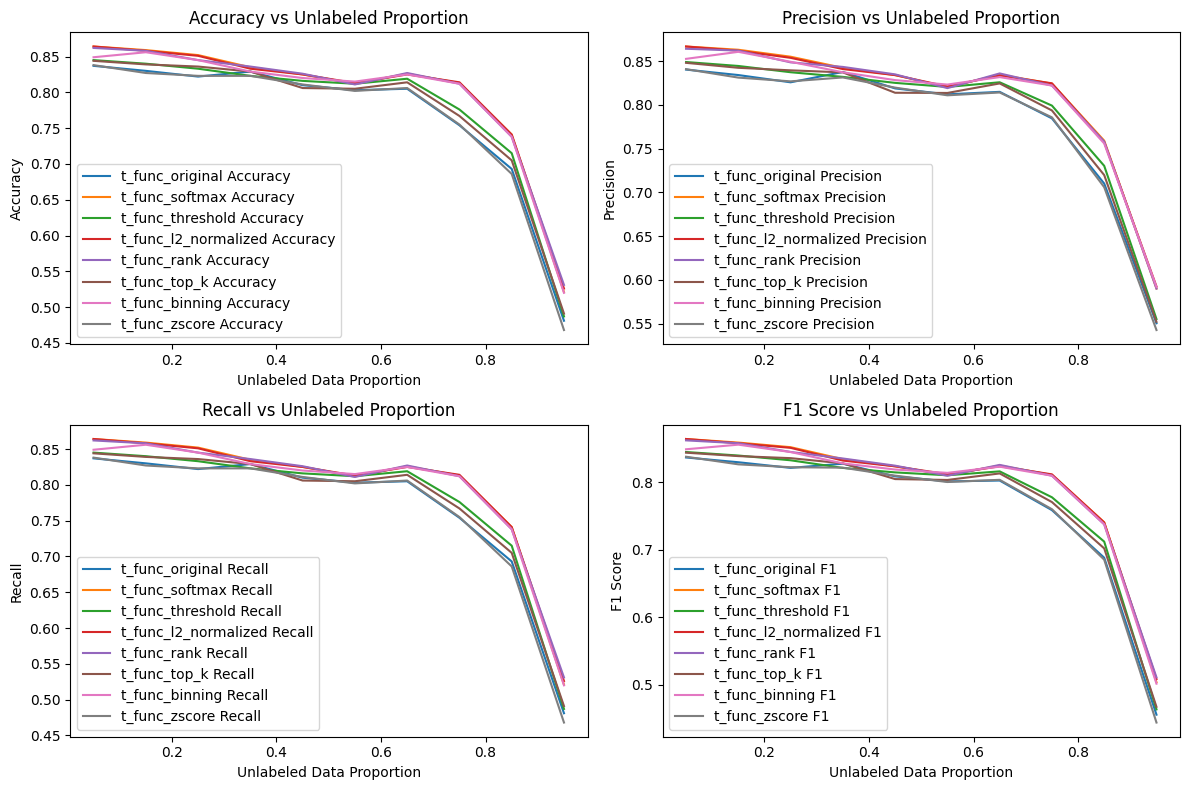

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# List to store results for plotting
results_dict = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} 
                for name in transformation_names}

# Define the range of unlabeled data proportions
unlabeled_proportions = np.linspace(0.05, 0.95, 10)  # Unlabeled proportion from 0.05 to 0.95

# Iterate over each transformation function and unlabeled data proportion
for t_name in transformation_names:
    for unlabeled_proportion in unlabeled_proportions:
        # Call the cross-validation function with the current t_func and unlabeled_proportion
        results = cross_validate_linear_subspace(
            dataset_F1=dataset_F1,
            dataset_F2=dataset_F2,
            labels=labels,
            unlabeled_proportion=unlabeled_proportion,
            t_func=t_name
        )

        # Extract the metrics for the transformed model
        transformed_accuracy = np.mean(results['transformed']['accuracy'])
        transformed_precision = np.mean(results['transformed']['precision'])
        transformed_recall = np.mean(results['transformed']['recall'])
        transformed_f1 = np.mean(results['transformed']['f1'])

        # Store the results in the results_dict
        results_dict[t_name]['accuracy'].append(transformed_accuracy)
        results_dict[t_name]['precision'].append(transformed_precision)
        results_dict[t_name]['recall'].append(transformed_recall)
        results_dict[t_name]['f1'].append(transformed_f1)

# Plot the results for each transformation function
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
for t_name in transformation_names:
    plt.plot(unlabeled_proportions, results_dict[t_name]['accuracy'], label=f"{t_name} Accuracy")
plt.title('Accuracy vs Unlabeled Proportion')
plt.xlabel('Unlabeled Data Proportion')
plt.ylabel('Accuracy')
plt.legend()

# Plot Precision
plt.subplot(2, 2, 2)
for t_name in transformation_names:
    plt.plot(unlabeled_proportions, results_dict[t_name]['precision'], label=f"{t_name} Precision")
plt.title('Precision vs Unlabeled Proportion')
plt.xlabel('Unlabeled Data Proportion')
plt.ylabel('Precision')
plt.legend()

# Plot Recall
plt.subplot(2, 2, 3)
for t_name in transformation_names:
    plt.plot(unlabeled_proportions, results_dict[t_name]['recall'], label=f"{t_name} Recall")
plt.title('Recall vs Unlabeled Proportion')
plt.xlabel('Unlabeled Data Proportion')
plt.ylabel('Recall')
plt.legend()

# Plot F1 Score
plt.subplot(2, 2, 4)
for t_name in transformation_names:
    plt.plot(unlabeled_proportions, results_dict[t_name]['f1'], label=f"{t_name} F1")
plt.title('F1 Score vs Unlabeled Proportion')
plt.xlabel('Unlabeled Data Proportion')
plt.ylabel('F1 Score')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()



--- Fold 1 ---
X1_train_unlabeled (40, 12)
X2_train_unlabeled (40, 12)
Transformed Model - Fold 1: Accuracy=0.8100, Precision=0.8100, Recall=0.8100, F1=0.8100
[[24  0  0 18]
 [ 0 52  0  0]
 [ 0  0 49  0]
 [19  0  0 38]]
Baseline Model - Fold 1: Accuracy=0.8150, Precision=0.8156, Recall=0.8150, F1=0.8153

--- Fold 2 ---
X1_train_unlabeled (40, 12)
X2_train_unlabeled (40, 12)
Transformed Model - Fold 2: Accuracy=0.8250, Precision=0.8251, Recall=0.8250, F1=0.8250
[[30  0  0 18]
 [ 0 54  0  0]
 [ 0  0 49  0]
 [18  0  0 31]]
Baseline Model - Fold 2: Accuracy=0.8200, Precision=0.8200, Recall=0.8200, F1=0.8200

--- Fold 3 ---
X1_train_unlabeled (40, 12)
X2_train_unlabeled (40, 12)
Transformed Model - Fold 3: Accuracy=0.8500, Precision=0.8623, Recall=0.8500, F1=0.8488
[[29  0  0 23]
 [ 0 56  0  0]
 [ 0  0 49  0]
 [ 8  0  0 35]]
Baseline Model - Fold 3: Accuracy=0.8450, Precision=0.8585, Recall=0.8450, F1=0.8434

--- Fold 4 ---
X1_train_unlabeled (40, 12)
X2_train_unlabeled (40, 12)
Transforme

ValueError: x and y must have same first dimension, but have shapes (10,) and (80,)

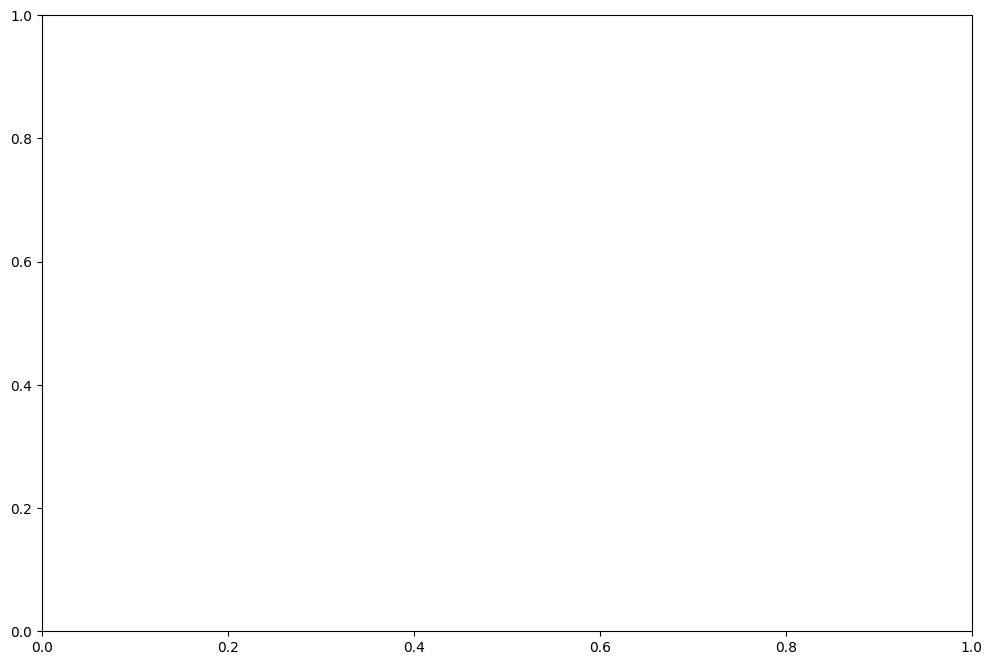

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List to store results for plotting
results_dict = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} 
                for name in transformation_names}

baseline_accuracies = []

# Define the range of unlabeled data proportions
unlabeled_proportions = np.linspace(0.05, 0.95, 10)  # Unlabeled proportion from 0.05 to 0.95

# Iterate over each transformation function and unlabeled data proportion
count = 0
for t_name in transformation_names:
    for unlabeled_proportion in unlabeled_proportions:
        # Call the cross-validation function with the current t_func and unlabeled_proportion
        results = cross_validate_linear_subspace(
            dataset_F1=dataset_F1,
            dataset_F2=dataset_F2,
            labels=labels,
            unlabeled_proportion=unlabeled_proportion,
            t_func=t_name
        )

        # Extract the metrics for the transformed model
        transformed_accuracy = np.mean(results['transformed']['accuracy'])

        # Store the transformed accuracy in the results_dict
        results_dict[t_name]['accuracy'].append(transformed_accuracy)
        
        if count == 0:
            # Also store the baseline accuracy
            baseline_accuracy = np.mean(results['baseline']['accuracy'])
            baseline_accuracies.append(baseline_accuracy)
    count += 1

# Plot the results for each transformation function
plt.figure(figsize=(12, 8))

# Plot Accuracy (with baseline included)
plt.plot(unlabeled_proportions, baseline_accuracies, label="Baseline Accuracy", color='black', linestyle='--')
for t_name in transformation_names:
    plt.plot(unlabeled_proportions, results_dict[t_name]['accuracy'], label=f"{t_name} Accuracy")
    
plt.title('Accuracy vs Unlabeled Proportion')
plt.xlabel('Unlabeled Data Proportion')
plt.ylabel('Accuracy')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


In [8]:
print(unlabeled_proportions)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


In [9]:
baseline_accuracies

[np.float64(0.837),
 np.float64(0.8240000000000001),
 np.float64(0.8210000000000001),
 np.float64(0.8220000000000001),
 np.float64(0.8109999999999999),
 np.float64(0.8029999999999999),
 np.float64(0.808),
 np.float64(0.7609999999999999),
 np.float64(0.704),
 np.float64(0.471),
 np.float64(0.837),
 np.float64(0.8240000000000001),
 np.float64(0.8210000000000001),
 np.float64(0.8220000000000001),
 np.float64(0.8109999999999999),
 np.float64(0.8029999999999999),
 np.float64(0.808),
 np.float64(0.7609999999999999),
 np.float64(0.704),
 np.float64(0.471),
 np.float64(0.837),
 np.float64(0.8240000000000001),
 np.float64(0.8210000000000001),
 np.float64(0.8220000000000001),
 np.float64(0.8109999999999999),
 np.float64(0.8029999999999999),
 np.float64(0.808),
 np.float64(0.7609999999999999),
 np.float64(0.704),
 np.float64(0.471),
 np.float64(0.837),
 np.float64(0.8240000000000001),
 np.float64(0.8210000000000001),
 np.float64(0.8220000000000001),
 np.float64(0.8109999999999999),
 np.float64(0.